In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram, array_to_latex
from qiskit.extensions import Initialize
from qiskit.result import marginal_counts
from qiskit.quantum_info import random_statevector
from qiskit.tools.monitor import job_monitor
import time
import numpy as np

In [2]:
def create_entanglement(qc,qA,qB):
    qc.h(qA)
    qc.cx(qA,qB)
def alice_part(qc,psi,qM):
    qc.cx(psi,qM)
    qc.h(psi)
def bobs_corrections(qc,crZ,crX):
    qc.x(Bregister[0]).c_if(crX,1)
    qc.z(Bregister[0]).c_if(crZ,1)
   

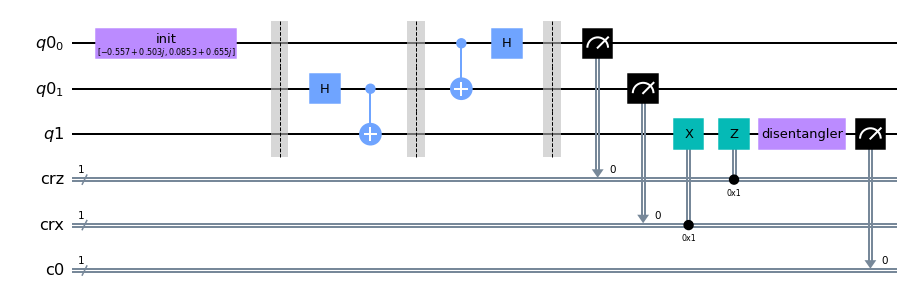

In [3]:
Aregister=QuantumRegister(2)
Bregister=QuantumRegister(1)
crz = ClassicalRegister(1, name="crz")
crx = ClassicalRegister(1, name="crx")
qc = QuantumCircuit(Aregister,Bregister, crz, crx)


psi = random_statevector(2)

init_gate = Initialize(psi)
#init_gate = Initialize([])
init_gate.label = "init"

# Initialize q0 from Alice
qc.append(init_gate, [Aregister[0]])
qc.barrier()

#Create an entangled pair for Alice and Bob
create_entanglement(qc, Aregister[1],Bregister[0])
qc.barrier()

#Begin the teleportation protocol
alice_part(qc,Aregister[0],Aregister[1])

# Alice then measures and sends her classical bits to Bob
qc.barrier()
qc.measure(Aregister[0],0)
qc.measure(Aregister[1],1)

# Bob decodes qubits
bobs_corrections(qc, crz, crx)

# reverse the initialization process
qc.append(init_gate.gates_to_uncompute(), [Bregister[0]])
cr_result = ClassicalRegister(1)
qc.add_register(cr_result)
qc.measure(2,2)

# Display the circuit
qc.draw()

Aer simulator

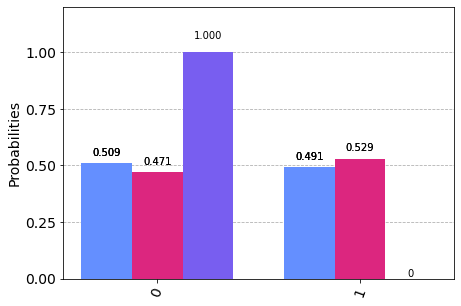

In [13]:
sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc, sim)
t_qc.save_statevector()
counts = sim.run(t_qc).result().get_counts()
qubit_counts = [marginal_counts(counts, [qubit]) for qubit in range(3)]
plot_histogram(qubit_counts)

CIRCUITO ALTERNATIVO

In [15]:
def new_bobs_corrections(qc,Areg, Breg):
    qc.cx(Areg[1],Breg[0])
    qc.cz(Areg[0],Breg[0])

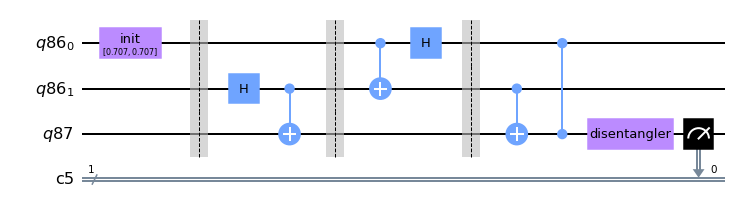

In [18]:
Aregister=QuantumRegister(2)
Bregister=QuantumRegister(1)
qcQito = QuantumCircuit(Aregister,Bregister)


psi = random_statevector(2)

init_gate = Initialize(psi)
#init_gate = Initialize([1/np.sqrt(2),1/np.sqrt(2)])
init_gate.label = "init"

# Initialize q0 from Alice
qcQito.append(init_gate, [Aregister[0]])
qcQito.barrier()

#Create an entangled pair for Alice and Bob
create_entanglement(qcQito, Aregister[1],Bregister[0])
qcQito.barrier()

#Begin the teleportation protocol
alice_part(qcQito,Aregister[0],Aregister[1])

# Alice then measures and sends her classical bits to Bob
qcQito.barrier()

# Bob decodes qubits
new_bobs_corrections(qcQito, Aregister, Bregister)

# reverse the initialization process
qcQito.append(init_gate.gates_to_uncompute(), [Bregister[0]])
cr_result = ClassicalRegister(1)
qcQito.add_register(cr_result)
qcQito.measure(2,0)

# Display the circuit
qcQito.draw()

In [ ]:
Quito Sysytem

In [7]:
IBMQ.load_account()
IBMQ.providers()
provider=IBMQ.get_provider('ibm-q')
sim= provider.get_backend('ibmq_quito')

Job Status: job has successfully run


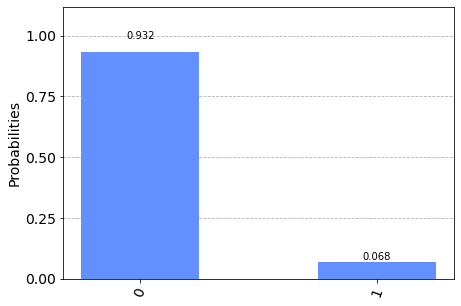

In [8]:
t_qc = transpile(qcQito, sim)
job_real = sim.run(t_qc)
job_monitor(job_real)
result_real = job_real.result()
toc = time.time()
counts=result_real.get_counts()
plot_histogram(counts)

Aer simulator

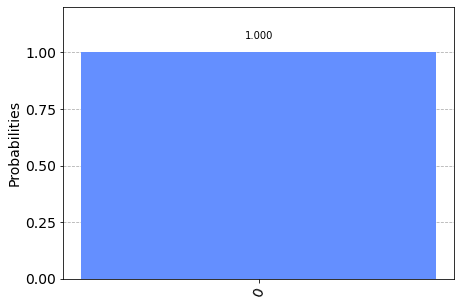

In [19]:
sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qcQito, sim)
t_qc.save_statevector()
counts = sim.run(t_qc).result().get_counts()
plot_histogram(counts)